# <center> <h1>    🏘️ 🏘️ 👨‍💻 🏘️ 🏘️

# <center> KNN - k nearest neighbor algorithm.

This is a Supervised algorithm. KNN is one of the simplest classification algorithms and is sometimes used in regression problems. The purpose of classification in machine learning is to assign a new object to one of the predefined classes.

During knn train, the algorithm stores all incoming parameters and to which class they belong. Then the new data arrives, and the distance between it and the stored data is found. k nearest neighbors are found, the new data belongs to the class to which these k nearest neighbors belong more. (regression takes the average of k nearest neighbors)

* Step 1: We define the number of neighbors K
* Step 2: We calculate the Euclidean distance of K neighbors
* Step 3: We get K nearest neighbors according to the calculated Euclidean distance.
* Step 4: We count the number of data points in each category among these k neighbors.
* Step 5: We assign the new data points to the category with the maximum number of neighbors.
* Step 6: Our model is ready.


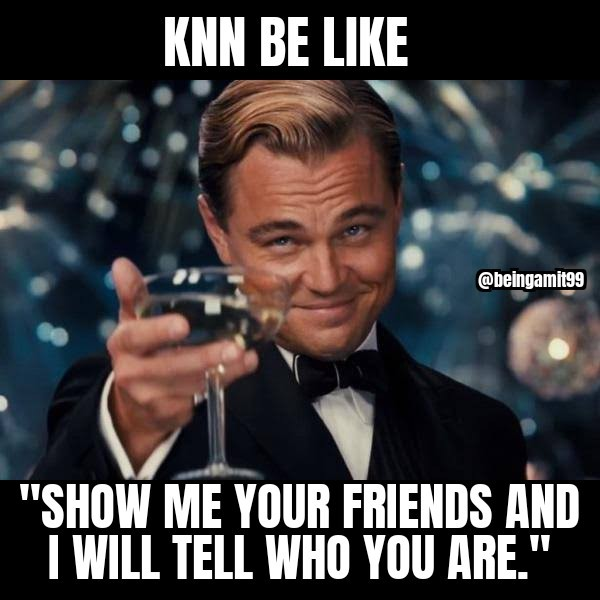

For example, we have 4 data. 2 of them belong to class A and 2 to class B

Their location on the (x,y) axis

k = 3

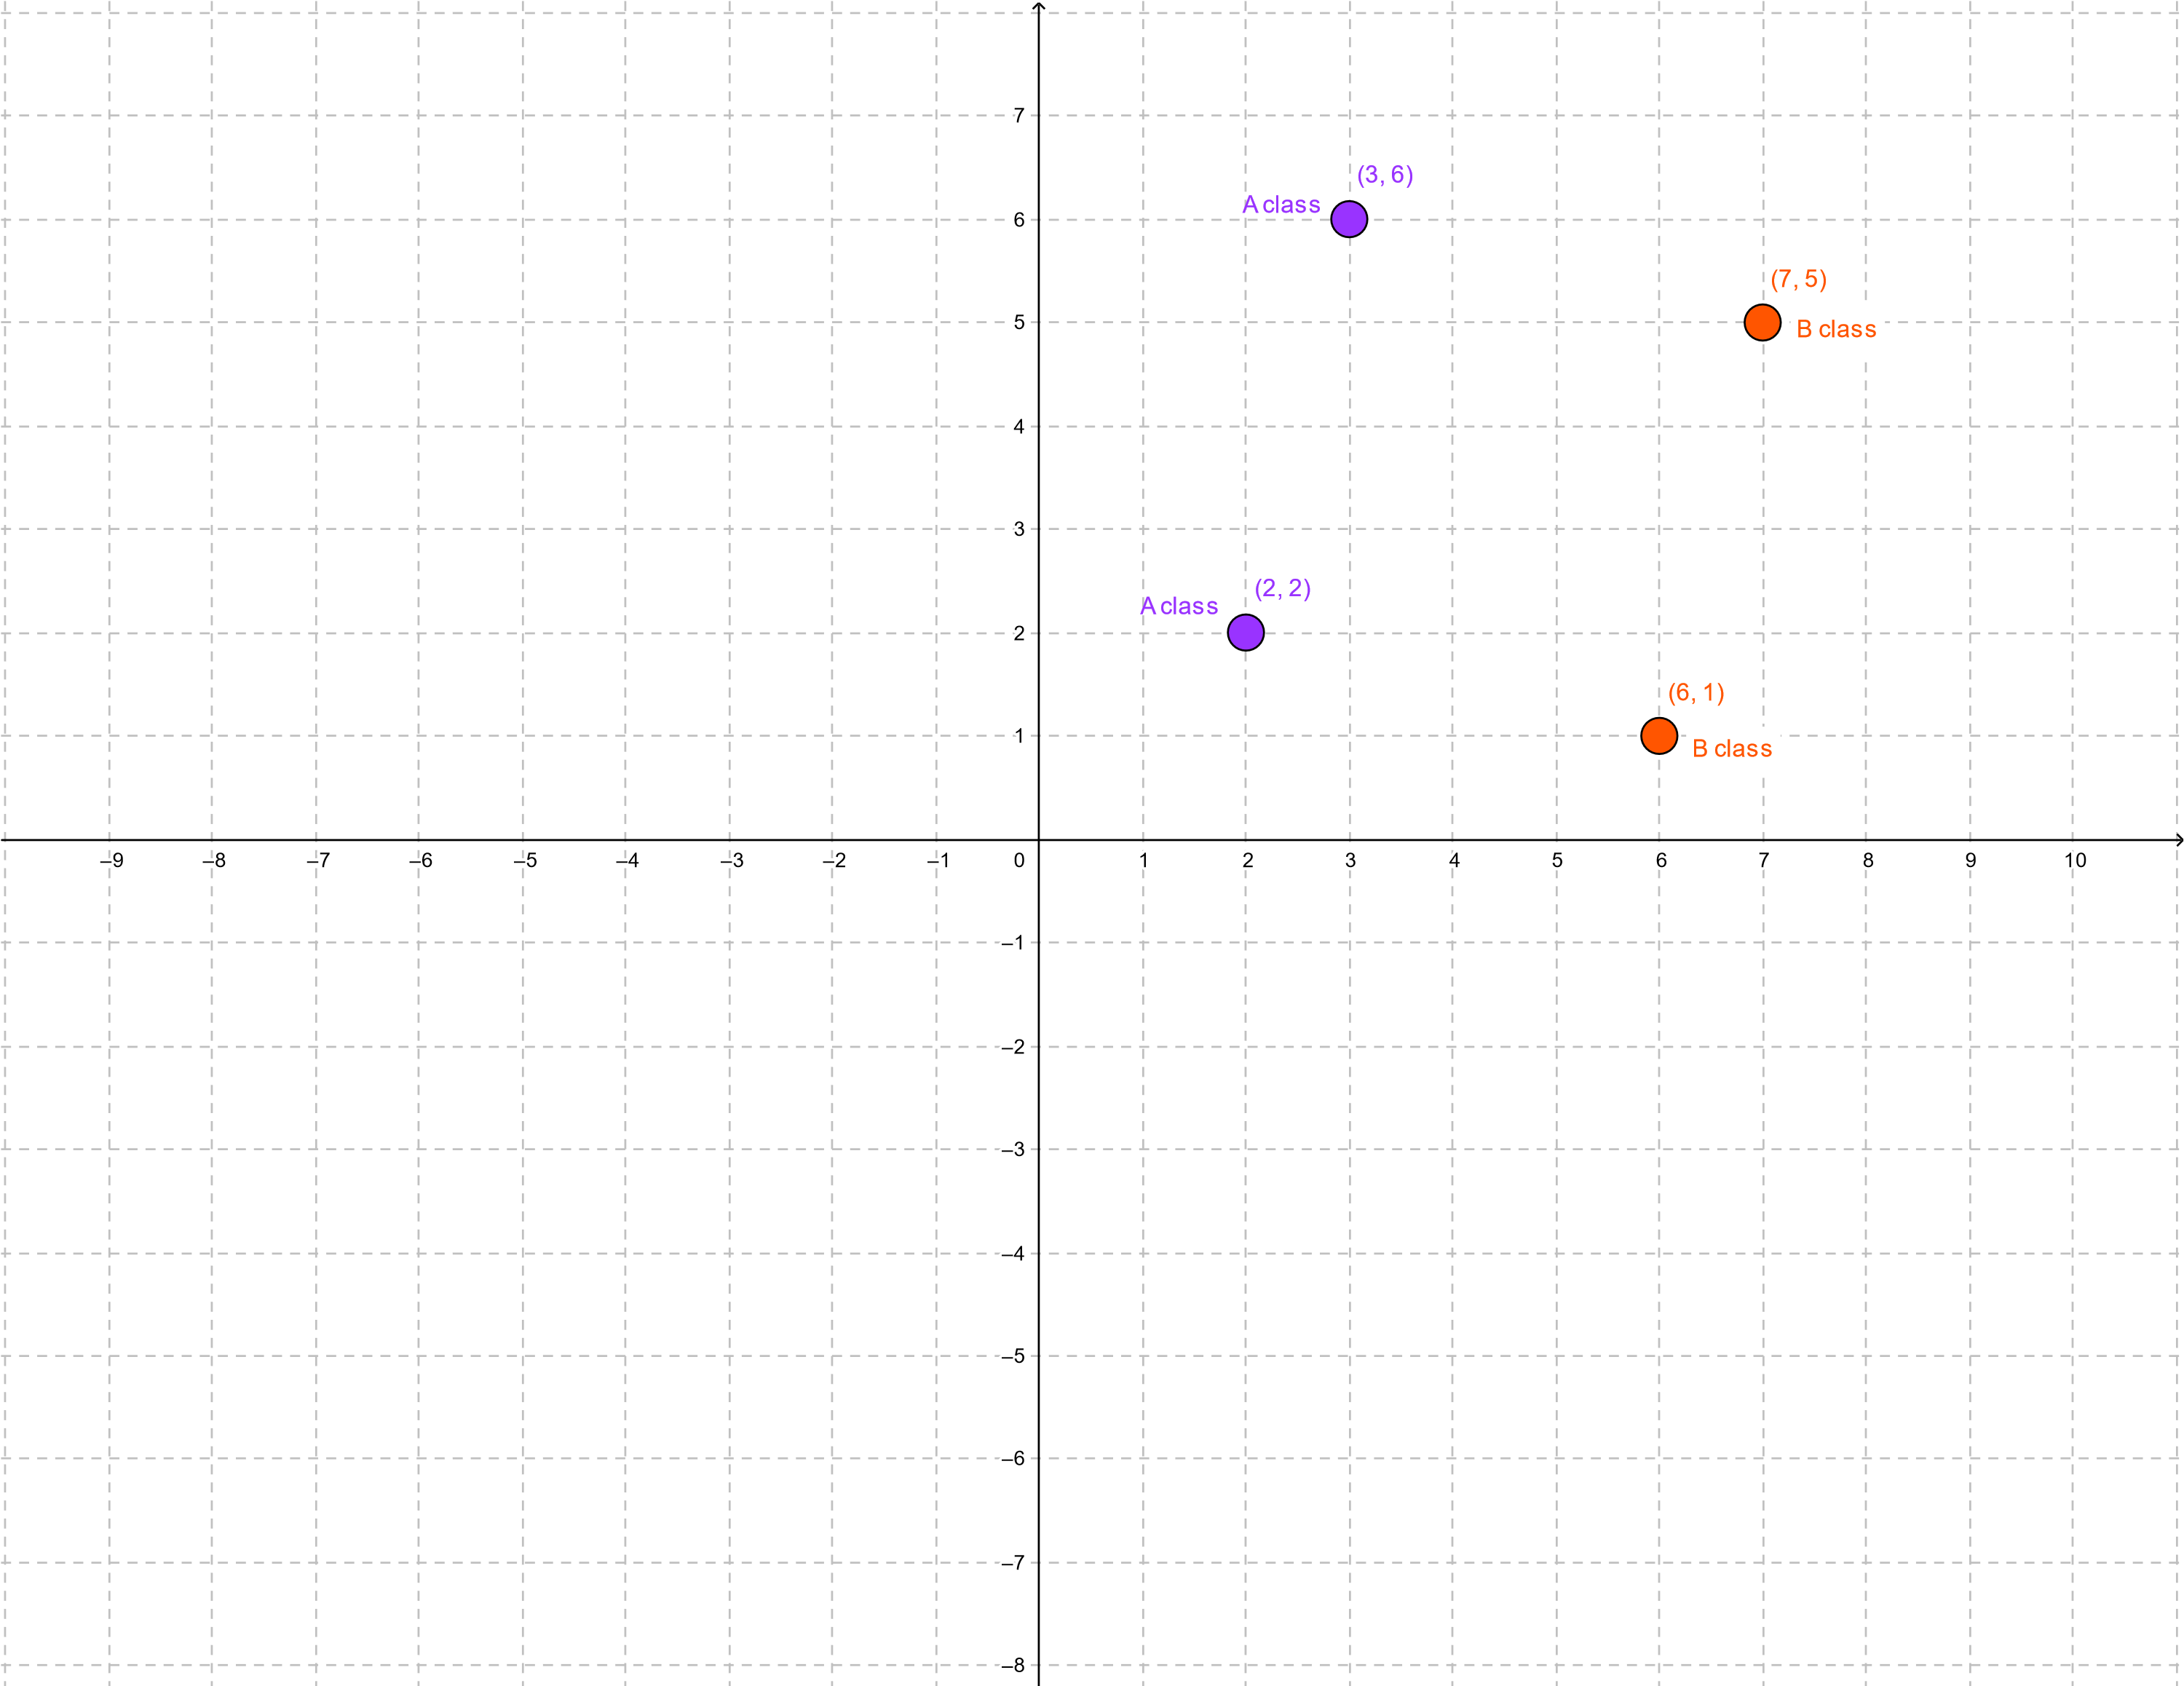


Now we have new data. We need to find out which class it belongs to.


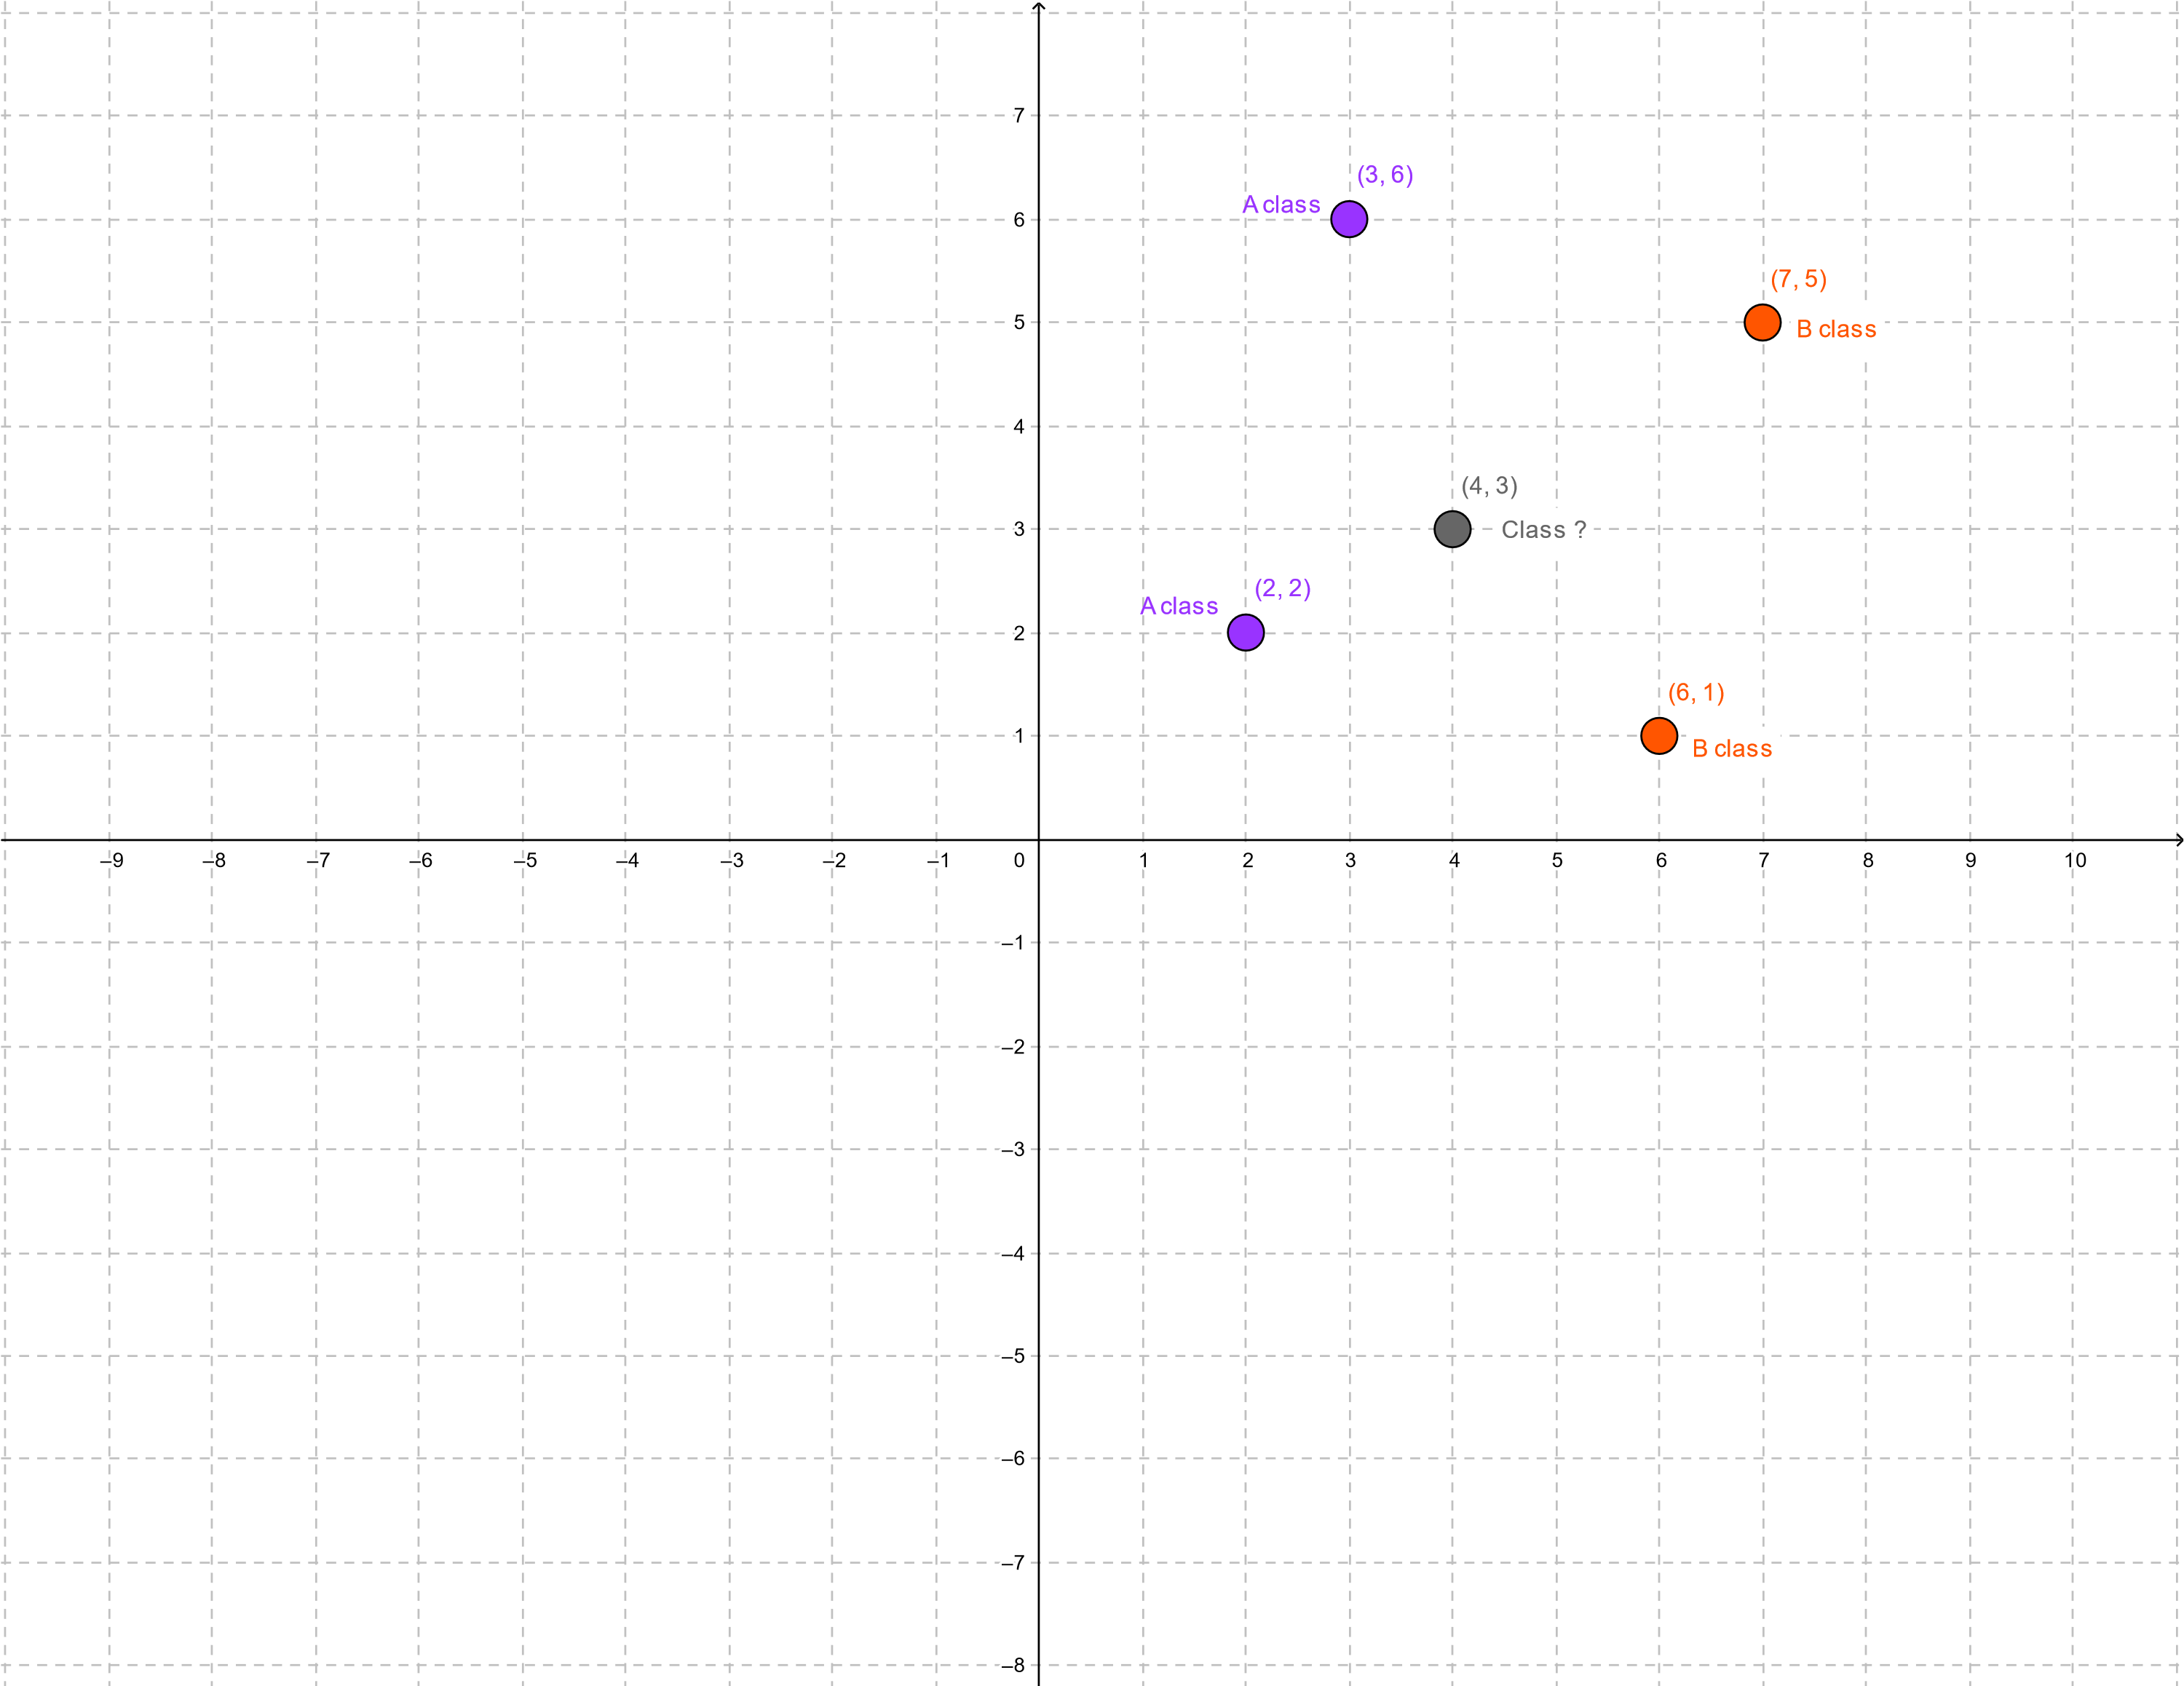

To do this, we calculate the distance from the new point to all other points.

For this we can calculate the distance by Euclid, Hemming, Chebeshev and other methods,

We choose the Euclidean distance

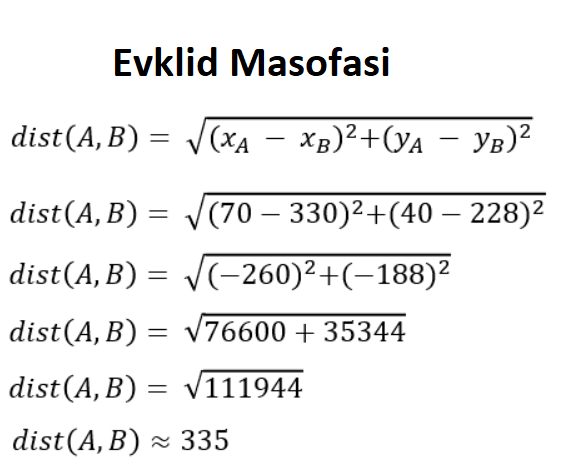

We also calculate by this method



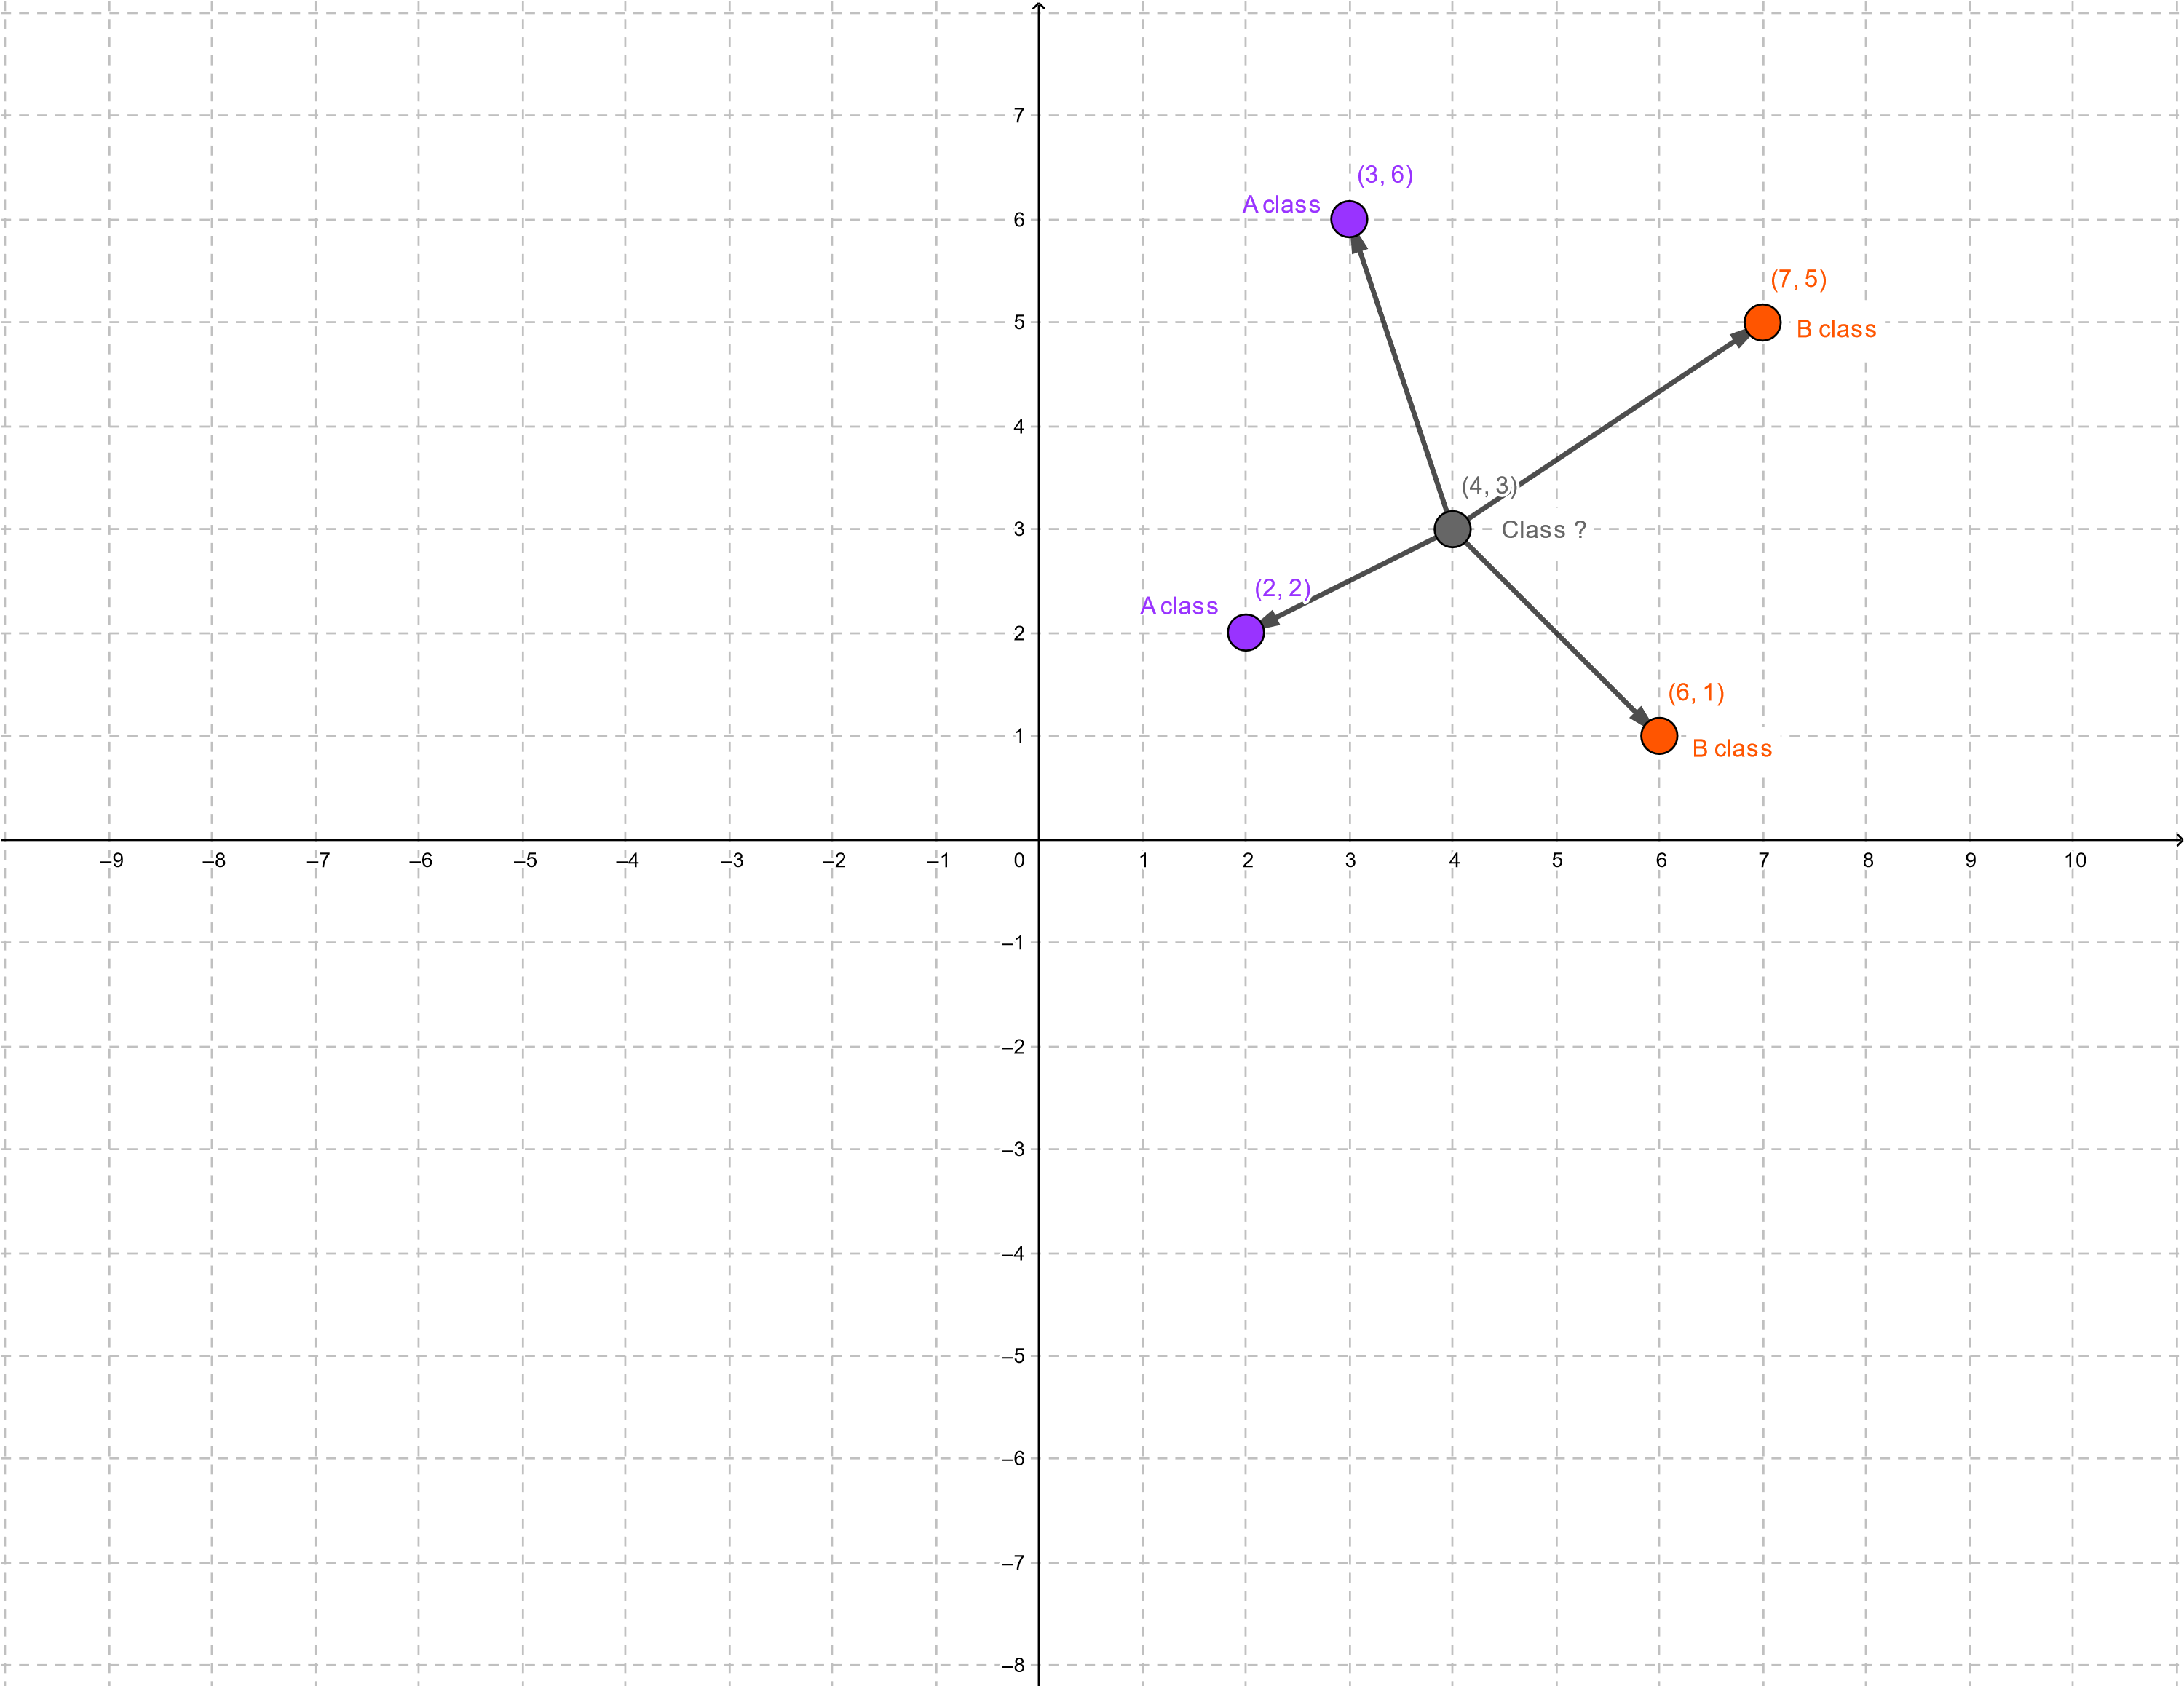

So we calculated the distance from our new point to the remaining points.

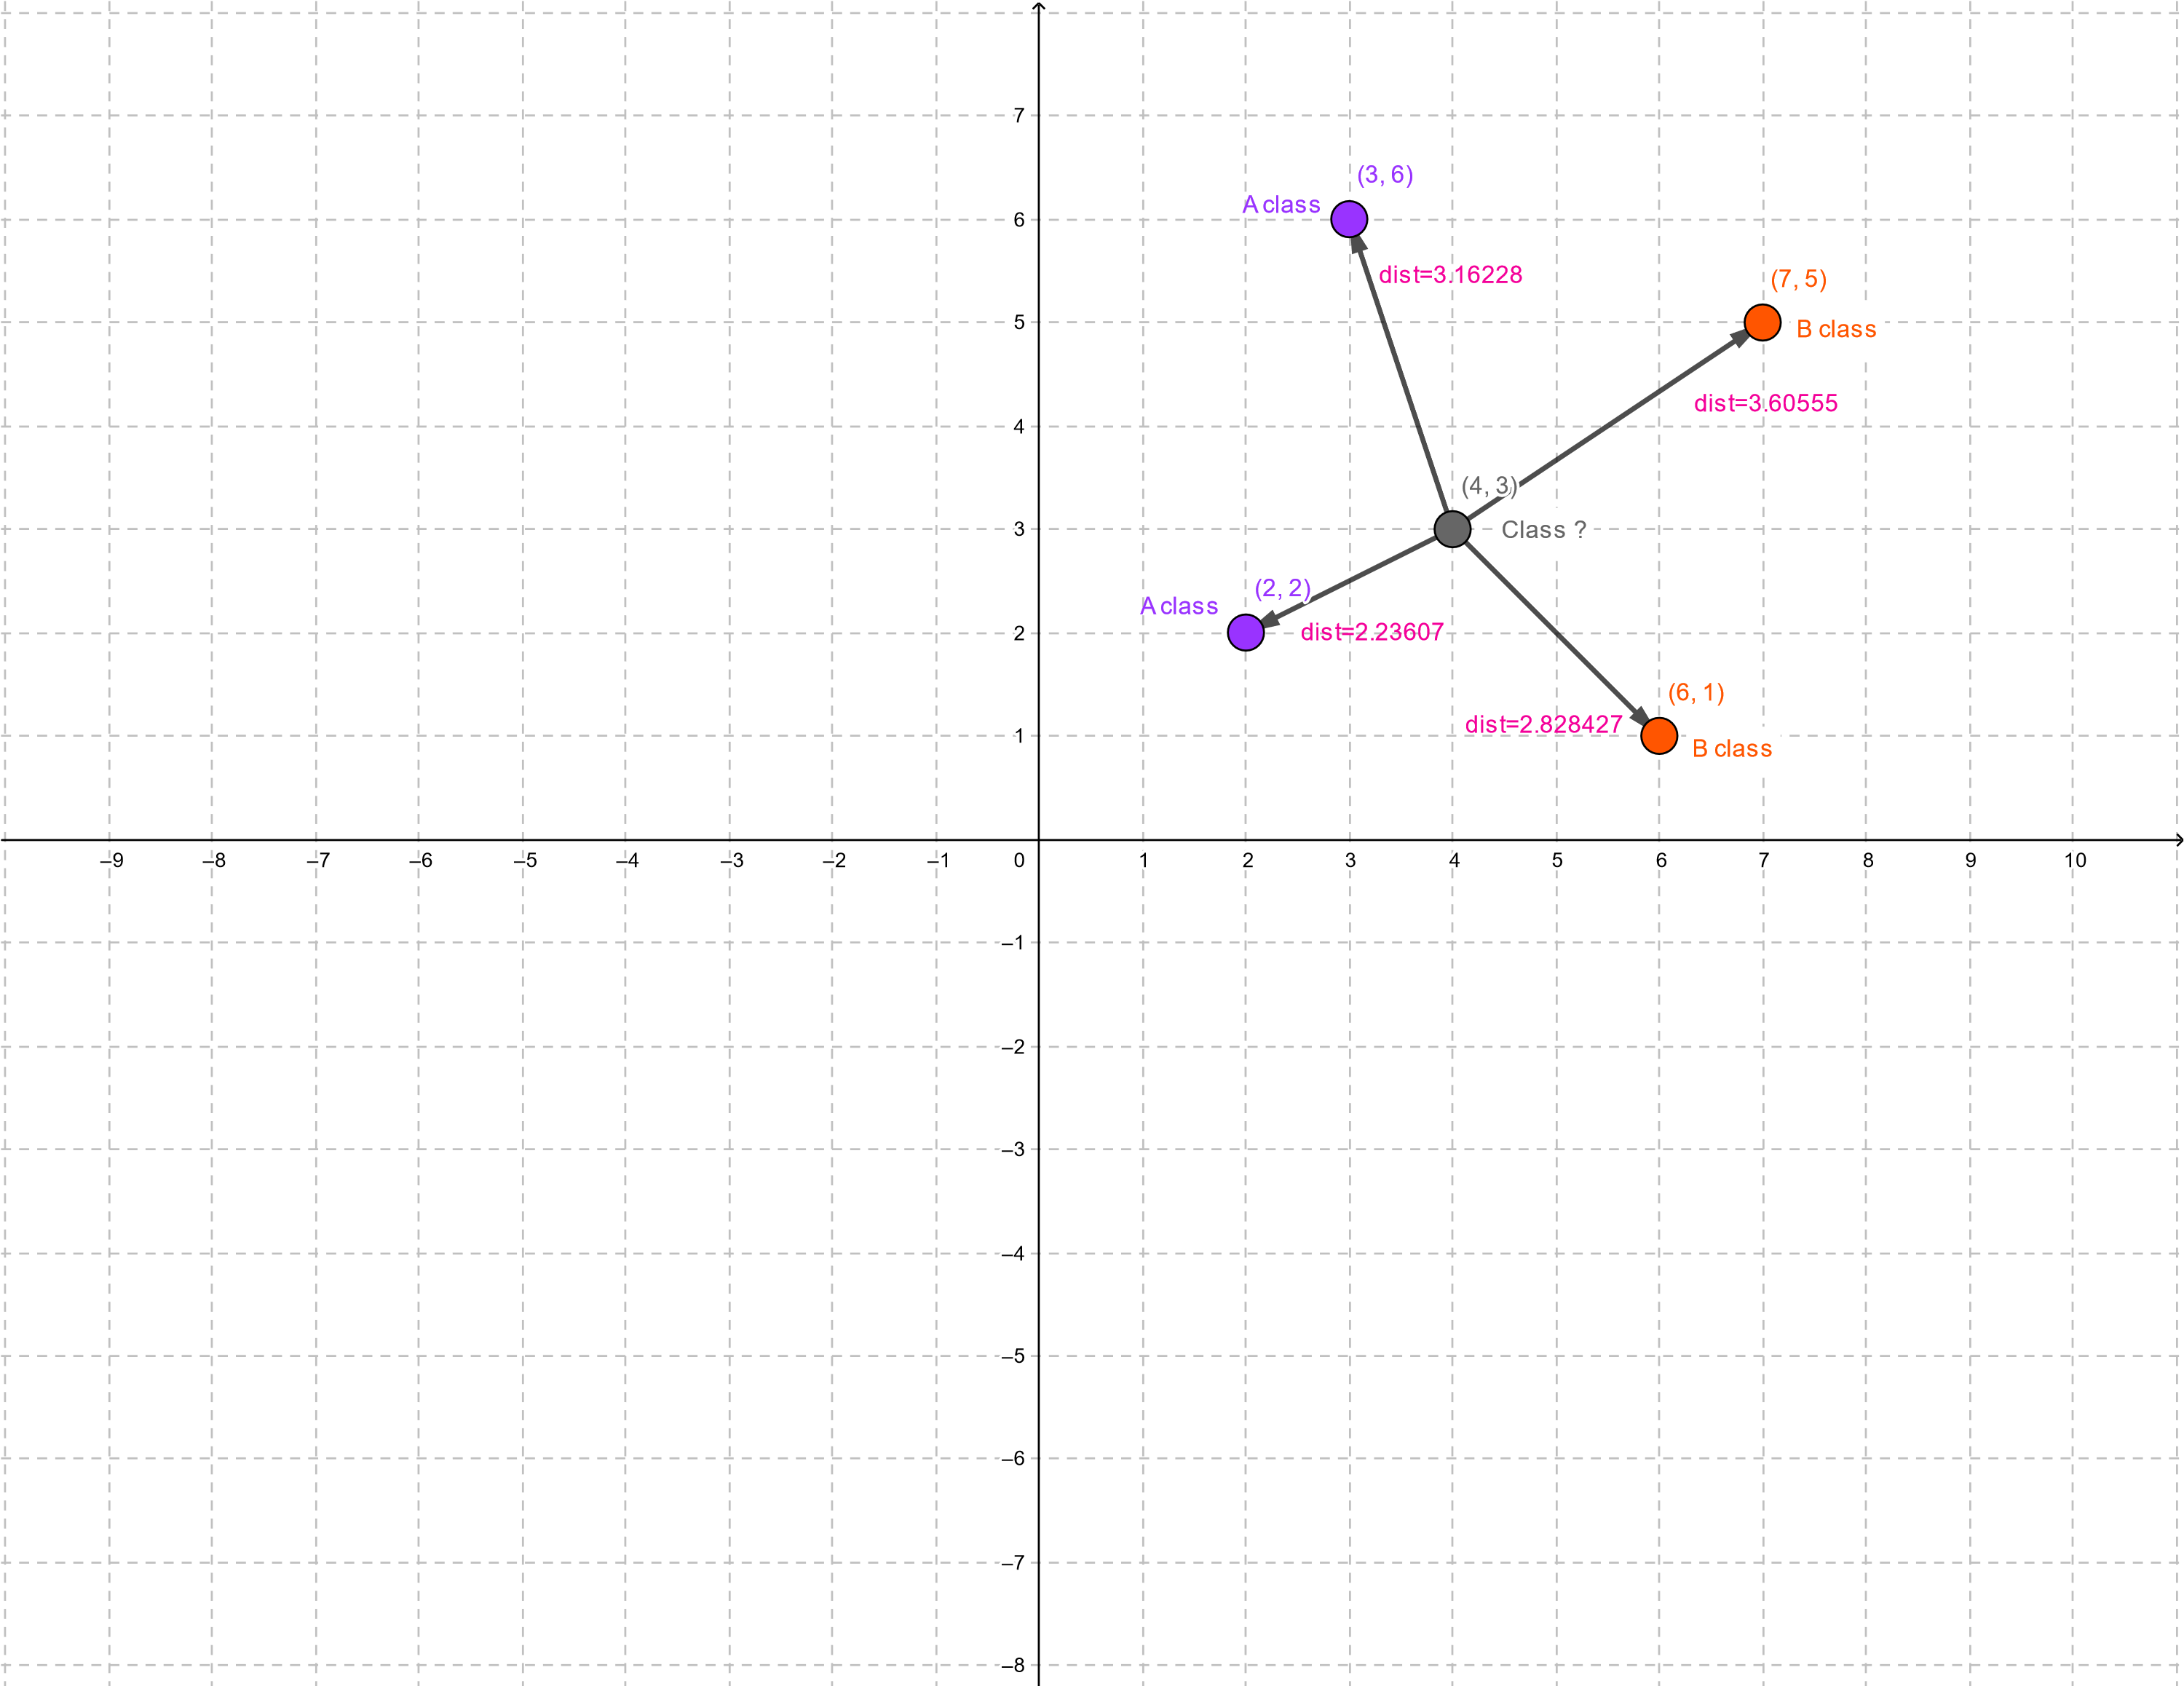

We had k=3, so let's choose the closest three

So

2.23607 - A class

2.82842 - B class

3.16228 - A class

Conclusion 2 of the 3 nearest neighbors belong to class A and 1 to class B. Our new point will also belong to A class

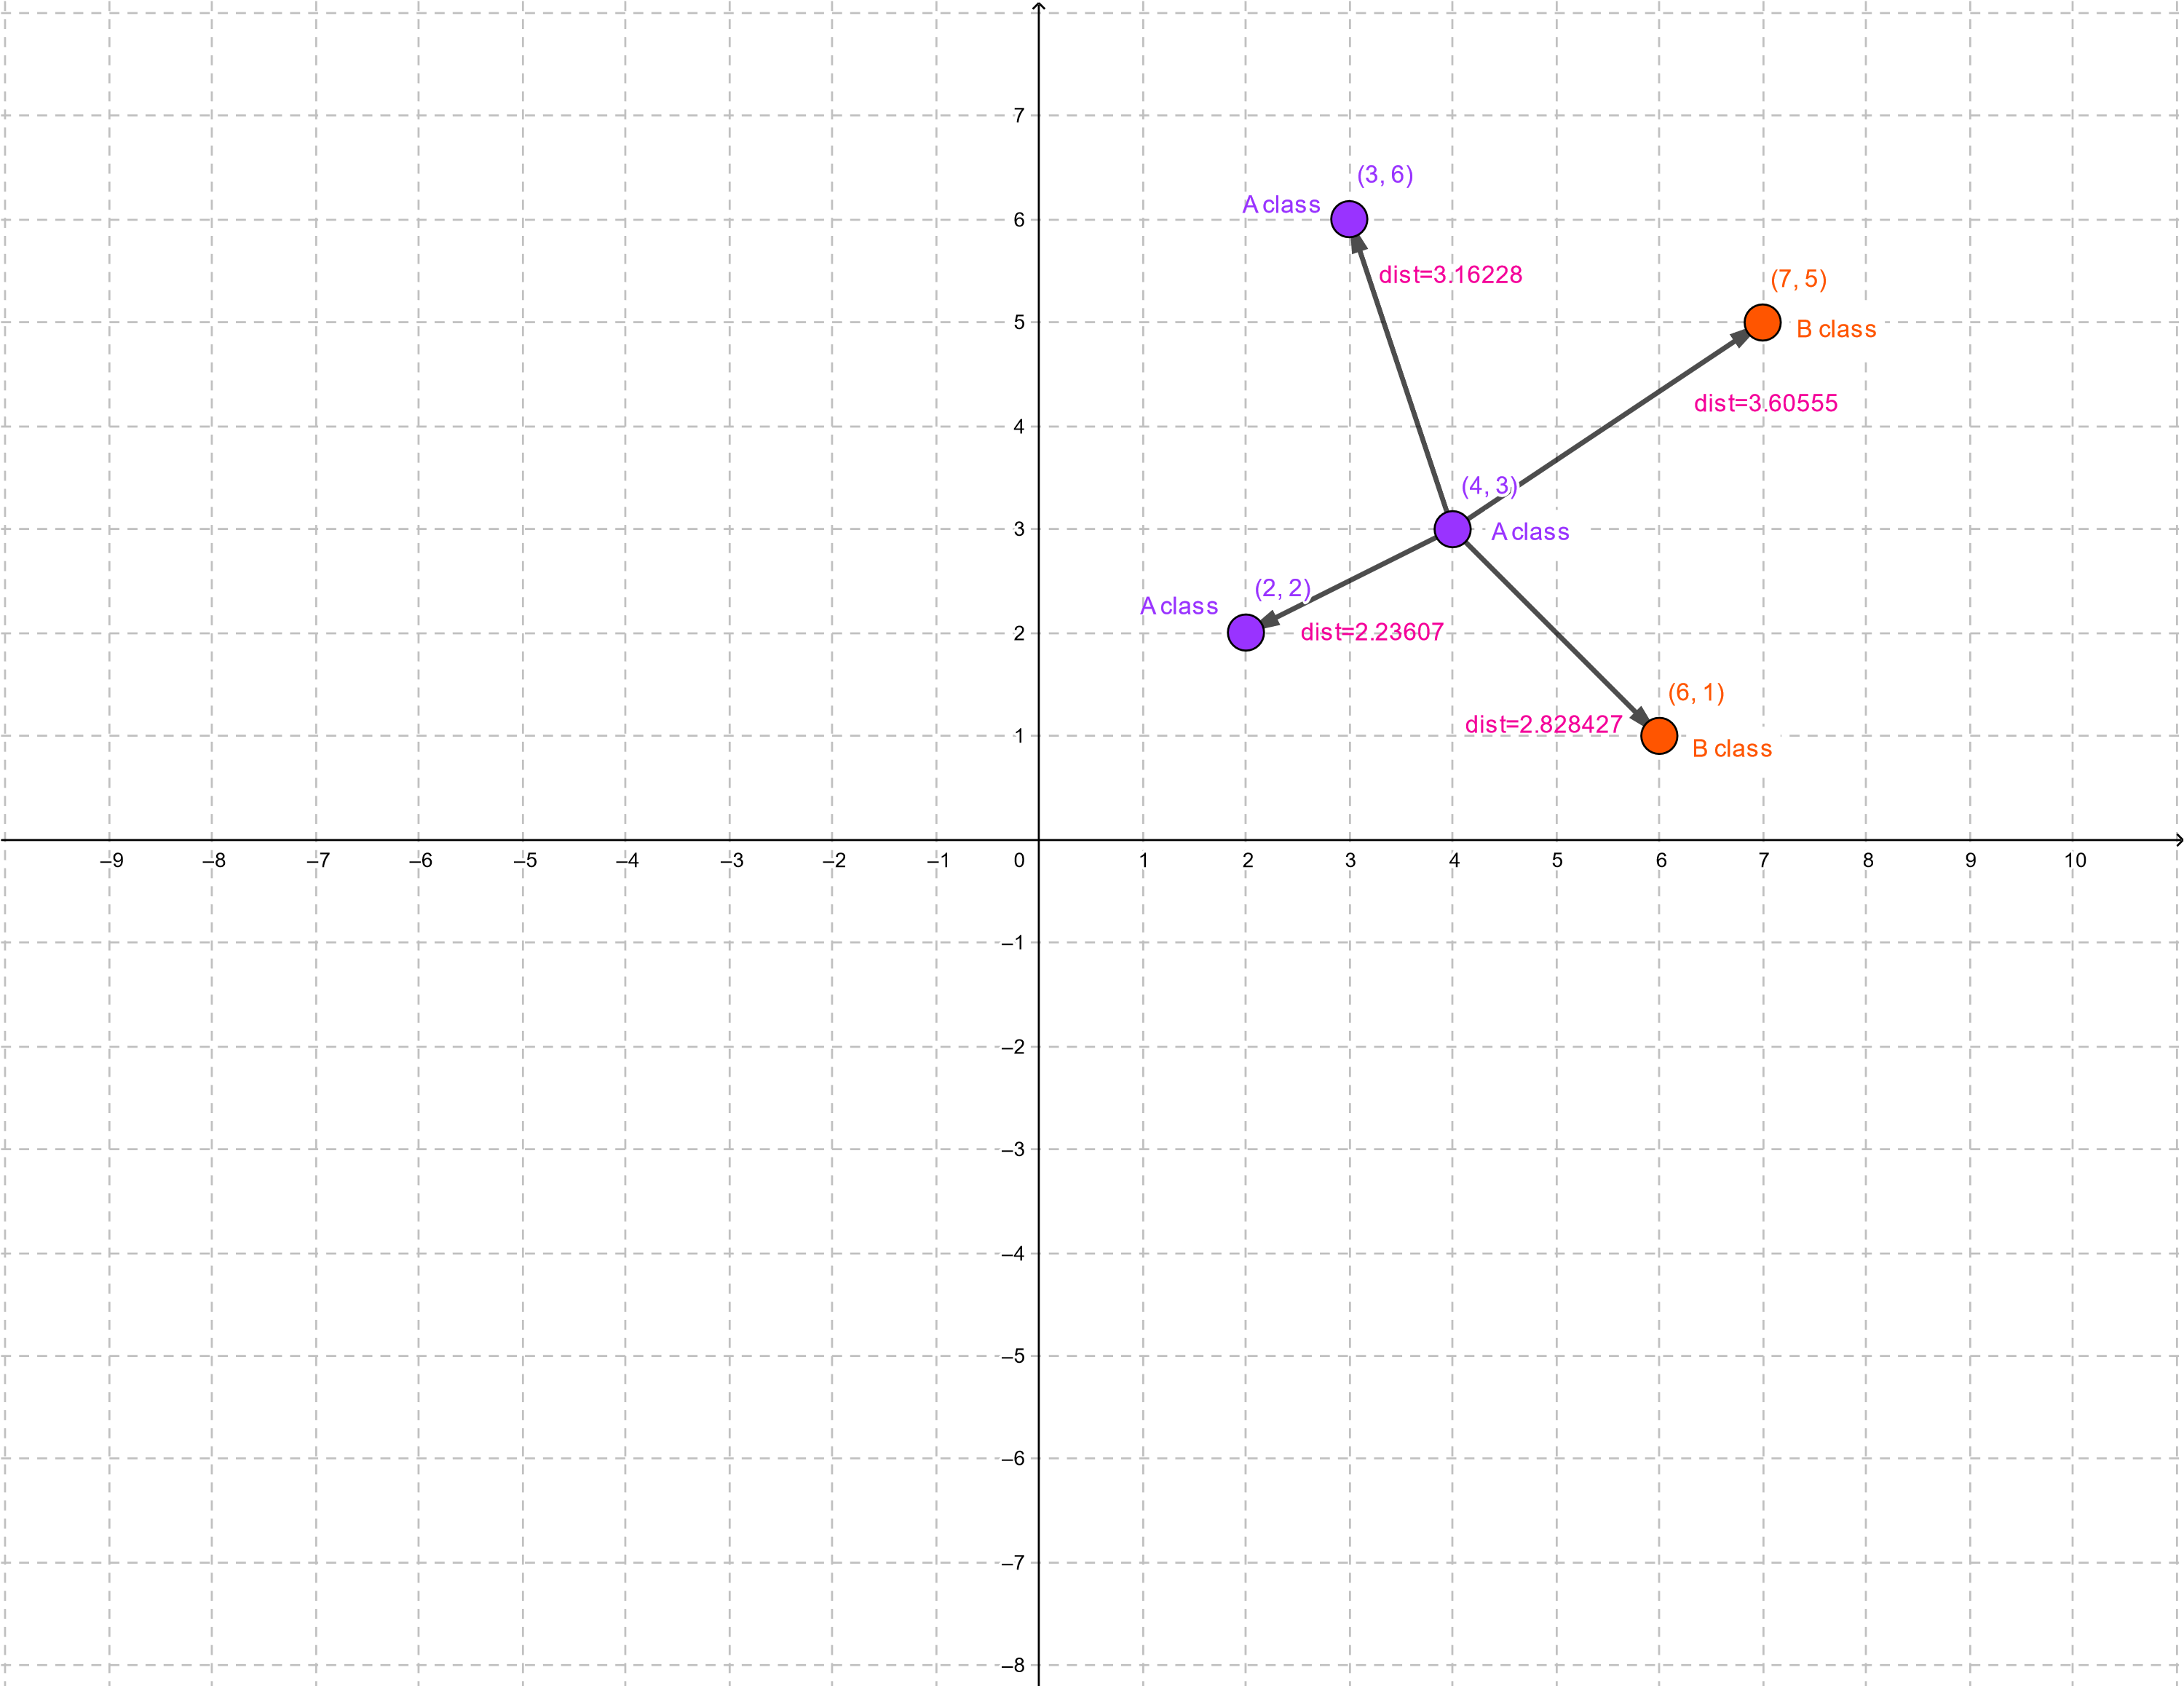

In [1]:
import pandas as pd
import numpy as np

We have a dataset of people's weight and height to test using KNN. Our class is Female and Male


# Read the data

In [2]:
data = pd.read_csv("Datasets/weight-height.csv")
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Normalize the data

In [3]:
data["Height"].max()

78.9987423463896

In [4]:
data["Height"] = data["Height"] / data["Height"].max()

In [5]:
data

,Gender,Height,Weight
0,Male,0.934787,241.893563
1,Male,0.870671,162.310473
2,Male,0.938118,212.740856
3,Male,0.908002,220.042470
4,Male,0.884594,206.349801
...,...,...,...
9995,Female,0.837642,136.777454
9996,Female,0.848965,170.867906
9997,Female,0.808468,128.475319
9998,Female,0.873865,163.852461


In [6]:
data["Weight"].max()

269.989698505106

In [7]:
data["Weight"] = data["Weight"] / data["Weight"].max()

In [8]:
data

,Gender,Height,Weight
0,Male,0.934787,0.895936
1,Male,0.870671,0.601173
2,Male,0.938118,0.787959
3,Male,0.908002,0.815003
4,Male,0.884594,0.764288
...,...,...,...
9995,Female,0.837642,0.506602
9996,Female,0.848965,0.632868
9997,Female,0.808468,0.475853
9998,Female,0.873865,0.606884


# Let's decode Class

that is, we can transfer it to the number form.

In [9]:
for i in range(len(data)):
    if  data.iloc[i, 0]=="Male":
        data.iloc[i, 0] = 1
    else:
        data.iloc[i, 0] = 0
        

In [10]:
data

,Gender,Height,Weight
0,1,0.934787,0.895936
1,1,0.870671,0.601173
2,1,0.938118,0.787959
3,1,0.908002,0.815003
4,1,0.884594,0.764288
...,...,...,...
9995,0,0.837642,0.506602
9996,0,0.848965,0.632868
9997,0,0.808468,0.475853
9998,0,0.873865,0.606884


# <center> Let's create a function that calculates the Euclidean distance

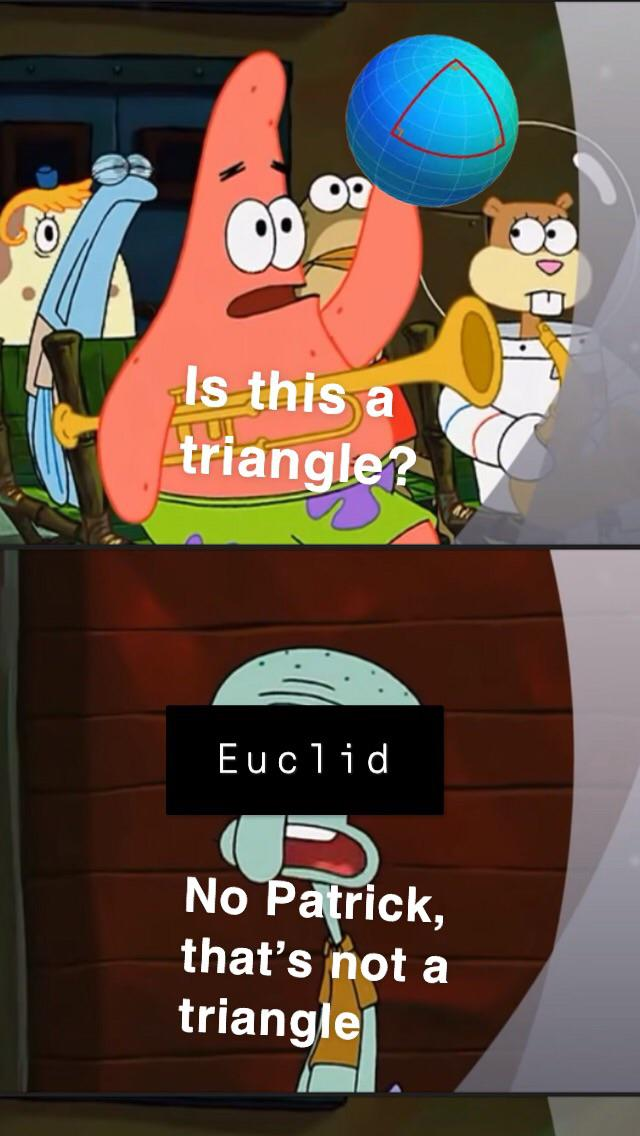

In [11]:
def euclidean(new_data):
    
    s=[]
    
    for i in range(len(data)):
        s.append(np.sqrt((new_data[0] - data.iloc[i, 1])**2 + (new_data[1] - data.iloc[i, 2])**2))
    return s

`Now we have received new data, we will check whether it belongs to the same class.`

# We also need to normalize the new data

`We've normalized our common data at the top, so we need to normalize the incoming data as well.`

In [12]:
new_data = [90.0 / 78.9987423463896, 150.0 / 269.989698505106]
new_data
# 78.9987423463896 and 269.989698505106 were the max values in our columns

[1.1392586429461453, 0.5555767528558622]

# We calculate the distance from the new data to the remaining data

In [13]:
distanse = euclidean(new_data)
distanse

[0.39705560231971504,
 0.27243052754043223,
 0.3073423626100293,
 0.34753696311430987,
 0.3292634896648959,
 0.28805764506732967,
 0.2964947513752411,
 0.28204072099764443,
 0.30634711821044247,
 0.3368341494032263,
 0.2739402036174319,
 0.33127988578159573,
 0.32565714990685646,
 0.30019620305651096,
 0.29537059425188505,
 0.294662234982118,
 0.28034917781763125,
 0.34017227109175036,
 0.2901472001016381,
 0.3040243203055157,
 0.29348353916340014,
 0.3146302371986941,
 0.30193004500062265,
 0.3466570669954424,
 0.28334895021328277,
 0.3180241575590747,
 0.29381827880136197,
 0.30282425835774235,
 0.3006820262259285,
 0.27267641066344567,
 0.30423032103124314,
 0.3084489233330395,
 0.28721643047121365,
 0.3335155994077283,
 0.3272299798437223,
 0.2946219725017903,
 0.31794540418177464,
 0.31468560633461895,
 0.31050924428948373,
 0.328871989610826,
 0.29061491269305073,
 0.278286281011766,
 0.320543689992023,
 0.3054871313989333,
 0.2898161622120798,
 0.2901847795055549,
 0.30762130570

# We will sort out the distance

In [14]:
distanse_sort = np.sort(distanse)
distanse_sort

array([0.24037337, 0.24134568, 0.24198835, ..., 0.52812048, 0.53420554,
       0.55177666])

# We find the index of nearest neighbors one by one

In [15]:
ind = []

for i in range(len(data)):
    
    for j in range(len(data)):
        
    
        if distanse_sort[i]==distanse[j]:
            ind.append(j)
            
    

In [16]:
ind

[3831,
 7924,
 2854,
 7162,
 9338,
 5092,
 1603,
 5687,
 5103,
 2546,
 5016,
 6161,
 5283,
 6116,
 424,
 4826,
 4140,
 8103,
 3208,
 3634,
 572,
 1691,
 835,
 5087,
 8300,
 5522,
 2060,
 3369,
 4309,
 7311,
 9424,
 3500,
 1806,
 5387,
 5902,
 2616,
 4668,
 6688,
 6288,
 792,
 5066,
 2503,
 5976,
 7180,
 64,
 2115,
 2909,
 6186,
 7600,
 935,
 1604,
 286,
 2750,
 1192,
 587,
 7265,
 8665,
 6846,
 1205,
 2539,
 568,
 9073,
 633,
 5406,
 2862,
 4322,
 3280,
 4816,
 4936,
 8333,
 4635,
 1556,
 3479,
 5101,
 8917,
 8881,
 8079,
 7082,
 1252,
 7503,
 2206,
 9076,
 7451,
 3782,
 2303,
 153,
 62,
 9011,
 659,
 2501,
 4243,
 4052,
 3416,
 6597,
 3696,
 4344,
 7856,
 4605,
 2255,
 1277,
 482,
 1441,
 8336,
 2247,
 8389,
 1384,
 6743,
 4399,
 356,
 1011,
 9762,
 4787,
 3519,
 4321,
 8080,
 3974,
 1411,
 4875,
 3397,
 7587,
 4811,
 7643,
 7379,
 8464,
 5393,
 3642,
 3635,
 3464,
 5366,
 1034,
 2884,
 9539,
 7400,
 6799,
 4793,
 3029,
 8135,
 2794,
 789,
 4996,
 1460,
 6092,
 4384,
 6817,
 1549,
 23

# Nearest neighbor indices

In [17]:
k = int(input("k="))
k_neighbors_ind = ind[:k]
k_neighbors_ind

k=5


[3831, 7924, 2854, 7162, 9338]

In [18]:
k_neighbors_ind = pd.Series(k_neighbors_ind)
k_neighbors_ind

0    3831
1    7924
2    2854
3    7162
4    9338
dtype: int64

# The new data belongs to the class of the nearest neighbors

In [19]:
k_nearest_neighbor = data.loc[k_neighbors_ind]
k_nearest_neighbor

,Gender,Height,Weight
3831,1,0.917703,0.648810
7924,0,0.902261,0.601184
2854,1,0.915942,0.648786
7162,0,0.916847,0.659172
9338,0,0.894374,0.588101


In [20]:
one_class = k_nearest_neighbor[k_nearest_neighbor["Gender"]==1]["Gender"].count()
one_class
# MAN

2

In [21]:
zero_class = k_nearest_neighbor[k_nearest_neighbor["Gender"]==0]["Gender"].count()
zero_class
# WOMEN

3

In [22]:
if one_class>zero_class:
    print("New data 1st class. MAN")
else:
    print("New data 0-class. WOMEN")

New data 0-class. WOMEN


# <center> We will do it through Class

In [23]:
data = pd.read_csv("Datasets/weight-height.csv")
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [24]:
h_max = data["Height"].max()
h_max

78.9987423463896

In [25]:
w_max = data["Weight"].max()
w_max

269.989698505106

# Normalize the data

In [26]:
data["Height"] = data["Height"] / data["Height"].max()
data["Weight"] = data["Weight"] / data["Weight"].max()

In [27]:
data

,Gender,Height,Weight
0,Male,0.934787,0.895936
1,Male,0.870671,0.601173
2,Male,0.938118,0.787959
3,Male,0.908002,0.815003
4,Male,0.884594,0.764288
...,...,...,...
9995,Female,0.837642,0.506602
9996,Female,0.848965,0.632868
9997,Female,0.808468,0.475853
9998,Female,0.873865,0.606884


In [28]:
x = data[["Height", "Weight"]].to_numpy()
x

array([[0.93478725, 0.89593627],
       [0.87067087, 0.60117284],
       [0.93811753, 0.78795916],
       ...,
       [0.80846847, 0.47585267],
       [0.87386509, 0.60688412],
       [0.78411686, 0.42093866]])

In [29]:
y = data[["Gender"]].to_numpy()
y

array([['Male'],
       ['Male'],
       ['Male'],
       ...,
       ['Female'],
       ['Female'],
       ['Female']], dtype=object)

# Decode the class

In [30]:
for i in range(len(data)):
    if y[i]=="Male":
        y[i] = 1
    else:
        y[i] = 0

In [31]:
x

array([[0.93478725, 0.89593627],
       [0.87067087, 0.60117284],
       [0.93811753, 0.78795916],
       ...,
       [0.80846847, 0.47585267],
       [0.87386509, 0.60688412],
       [0.78411686, 0.42093866]])

In [32]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [53]:
class KNN:
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def predict(self, x_test):
        
        if self.k%2==0:
            return print("make k an odd number!") # If we give k an even number, we have a problem finding the most 
                                                # frequent ones. Because k=4, 2 nearest neighbors belong to class A,
                                                # and the remaining 2 belong to class B. What class do we call the new data? 
                                                # To avoid this problem, k must be odd
        
        if self.k>len(self.x_train):
            return "K is larger than the dataset" # k must be smaller than the total data length
        
        x_test[0] = x_test[0]/h_max
        x_test[1] = x_test[1]/w_max  # we normalize the new data
        
    
        distanse=[]
        
        for i in range(len(self.x_train)):
            #print(self.x_train[i,0], ":", self.x_train[i,1], "---", x_test[0], ":", x_test[1])
            distanse.append(np.sqrt((x_test[0] - self.x_train[i,0])**2 + (x_test[1] - self.x_train[i, 1])**2)) # euclid
        
        
        distanse_sort = np.sort(distanse)
        #print(distanse_sort)
        ind = []

        for i in range(len(self.x_train)):
    
            for j in range(len(self.x_train)):
        
    
                if distanse_sort[i]==distanse[j]:
                    ind.append(j)
                
        #print(ind)        
        k_neighbors_ind = ind[:self.k]      
        
        k_nearest_neighbor_x = self.x_train[[k_neighbors_ind]]
        k_nearest_neighbor_x
            
        
        k_nearest_neighbor_y = self.y_train[[k_neighbors_ind]]
        k_nearest_neighbor_y
           
        
        one_class = 0
        zero_class = 0
        
        for i in range(len(k_nearest_neighbor_y[0])):
            if k_nearest_neighbor_y[0][i]==0:
                zero_class+=1
            else:
                one_class+=1
        
        classes = ""
        
        if one_class>zero_class:
            classes = "Man"
        else:
            classes = "Woman"
            
        return print("The new data belongs to the", classes, " class \n", "Indexes of the nearest ",
                     self.k," additions :\n", k_neighbors_ind,
                     "\n ", one_class, " of the ", self.k, " nearest neighbors say the new data belongs to the Male class and ",
                     zero_class, " say the new data belongs to the Female class")
        
        

In [54]:
knn = KNN(5)

In [55]:
knn.fit(x,y)

In [56]:
knn.predict([90,150.0])

The new data belongs to the Woman  class 
 Indexes of the nearest  5  additions :
 [3831, 7924, 2854, 7162, 9338] 
  2  of the  5  nearest neighbors say the new data belongs to the Male class and  3  say the new data belongs to the Female class


# <center> <h1> 👨‍💻   🚀  